Universidade Federal do Rio Grande do Sul (UFRGS)  
Programa de Pós-Graduação em Engenharia Civil (PPGEC)
### Introdução à Teoria de Vibrações - PEC00025
Aluno: Julian Alves Borges  
Professor Dr: Marcelo Maia Rocha
### Trabalho 1: Resposta dinâmica de um sistema com 1 grau de liberdade     




[1.   Introdução](#section_1)  
[2.   Dados iniciais](#section_2)  
[3.   Dados da medição](#section_3)  
[4.   Deslocamentos por Diferenciais Finitas e Duhamel](#section_4)  
[5.   Pseudo-espectro de aceletação](#section_5)  
[6.   Periodograma de entrada (input)](#section_6)  
[7.   Periodograma de saída (output)](#section_7)  


## 1. Introdução <a name="section_1"></a> 

Este trabalho tem como objetivo avaliar a resposta dinâmica de um sistema com um grau de liberdade sujeito a uma excitação na base. Para isso, foram coletados dados de aceleração de um viaduto com aplicativo iNVH, desenvolvido pela Bosch, para sitemas android. Com os dados coletados, foram calculados: os deslocamentos correspondentes, por meio da aplicação dos métodos de Diferenciais Finitas e de Duhamel; pseudo-espectro e periodogramas de entrada (input) e saída (output). Para tanto, utilizou-se da biblioteca MRPy e dos seguintes módulos:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MRPy import MRPy

## 2. Dados iniciais <a name="section_2"></a> 

Nesta seção os valores de massa (m) e frequência natural (fn) foram arbitrados, o coeficiente de amorteciemnto (zt) considerado 1% e o deslocamento inicial (u0) e velocidade inicial (v0) mantidos nulos. 

In [2]:
m  = 1.0      
fn = 1.0     
zt = 0.01
u0 = 0.
v0 = 0.

## 3. Dados da medição <a name="section_3"></a> 

Por meio do smartphone e aplicativo iNVH foi medido a aceleração do sistema, no caso um trecho do viaduto BR 453. O arquivo gerado pelo aplicativo possui extensão ".csv" lido pela biblioteca MRPy. A seguir foram plotados os gráficos de aceleração nos eixos x,y e z.

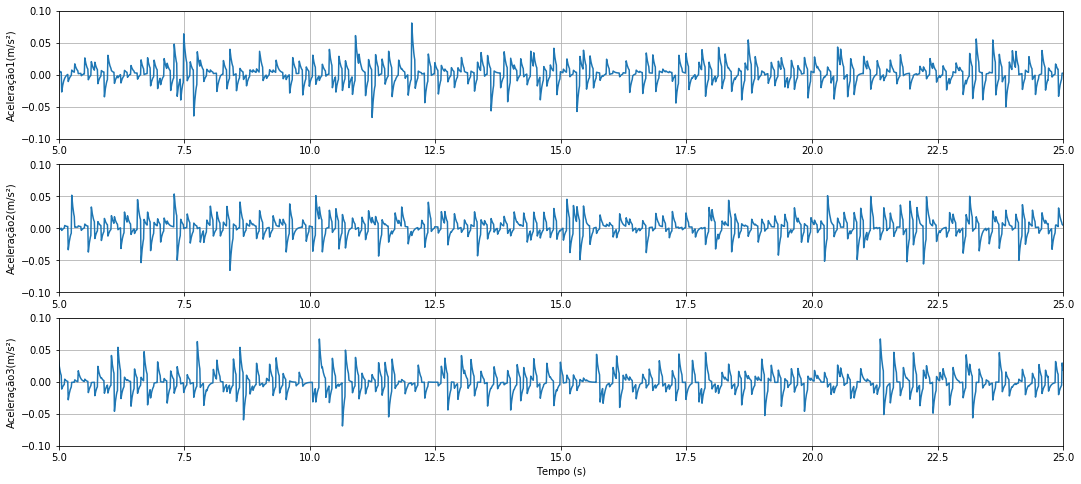

In [3]:
data = MRPy.from_file('Viaduto', form='invh').zero_mean()
t    = data.t_axis()

plt.figure(1, figsize=(18, 8), clear=True)

for kX, Aceleração in enumerate(data):
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, Aceleração)

    plt.xlim(5,25);             
    plt.ylim(-0.1, 0.1);    plt.ylabel('Aceleração{0}(m/s²)'.format(kX+1))  
    
    plt.grid(True);   
    
plt.xlabel('Tempo (s)');    

O eixo de interesse para o trabalho é o eixo vertical (eixo z), desta forma esse foi gerado individualmente, como se observa abaixo.

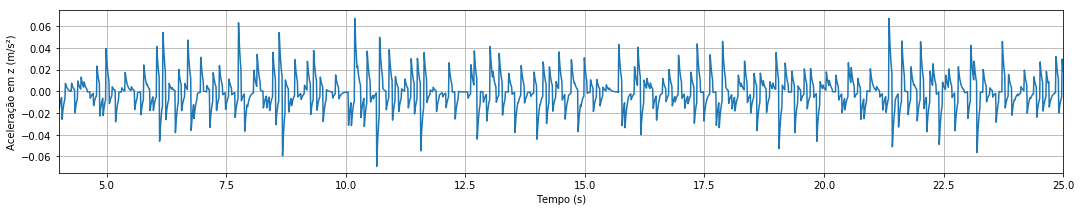

In [4]:
az = MRPy(data[2], data.fs)  
t  = az.t_axis()

plt.figure(2, figsize=(18, 3), clear=True)
plt.plot(t, az[0])

plt.xlim(4,25);           plt.xlabel('Tempo (s)') 
plt.ylim(-0.075,0.075);   plt.ylabel('Aceleração em z (m/s²)') 

plt.grid(True)

## 4. Deslocamentos por Diferenciais Finitas e Duhamel <a name="section_4"></a> 

Aqui foram calculados os deslocamentos pelos métodos de diferenciais finitas e de Duhamel. Os resultados foram plotados e comparados entre si.

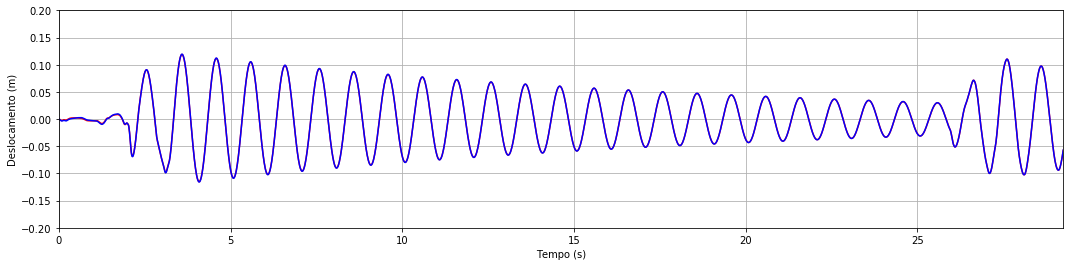

In [5]:
u_FD = az.sdof_fdiff  (fn, zt, u0, v0)/m
u_DH = az.sdof_Duhamel(fn, zt, u0, v0)/m

plt.figure(8, figsize=(18, 4), clear=True)
plt.plot(t, u_FD[0], 'r', t, u_DH[0], 'b')

plt.xlim(0, az.Td);    plt.xlabel('Tempo (s)') 
plt.ylim(-0.2, 0.2);   plt.ylabel('Deslocamento (m)') 

plt.grid(True)

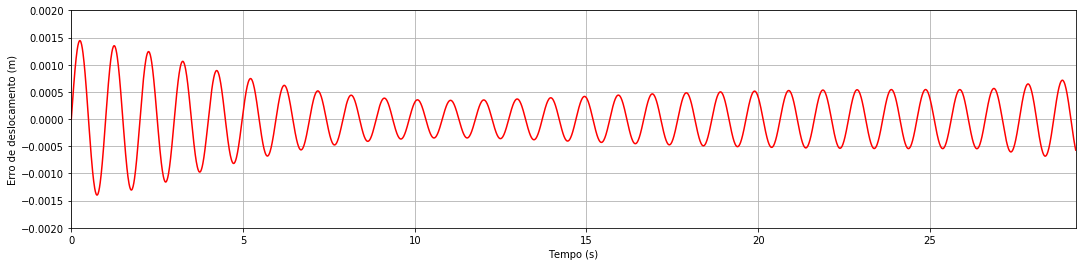

In [6]:
err = u_FD - u_DH

plt.figure(9, figsize=(18, 4), clear=True)
plt.plot(t, err[0], 'r')

plt.xlim(0, az.Td);        plt.xlabel('Tempo (s)') 
plt.ylim(-0.002, 0.002);   plt.ylabel('Erro de deslocamento (m)') 

plt.grid(True) 

## 5. Pseudo-espectro de aceleração <a name="section_5"></a> 
Nesta seção, foi determinado o pico de aceleração (aceleração máxima) que ficou em torno dos 60 m/s² e pode ser observada no gráfico a seguir.

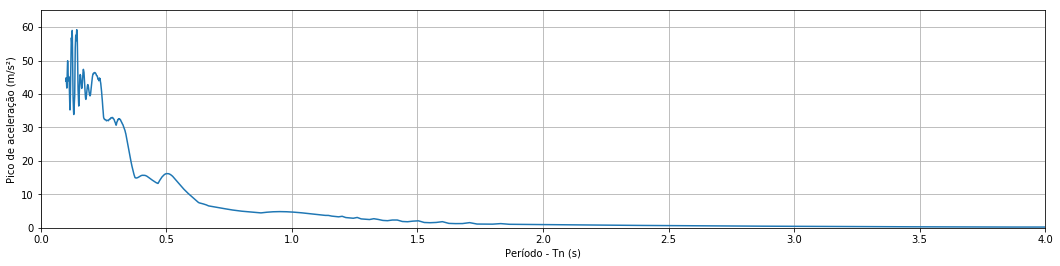

In [7]:
fn = np.linspace(0.1,10,1000)

u_max = []

for i in fn:
    u_DH = az.sdof_Duhamel(i, zt, u0, v0)/m
    u_max.append(u_DH.max())

wn = [2*np.pi*i for i in fn]
wn2 = np.array(wn)**2
umax_ray = np.array(u_max)

a_pico = np.multiply(wn2, umax_ray)

tn = [2*np.pi/x for x in wn]
Tn = np.array(tn)
u_max = np.array(u_max)


plt.figure(7, figsize=(18, 4), clear=True)
plt.plot(Tn, a_pico)

plt.xlim(0, 4);    plt.xlabel('Período - Tn (s)')
plt.ylim(0, 65);   plt.ylabel('Pico de aceleração (m/s²)') 

plt.grid(True)

## 6. Periodograma de entrada (input) <a name="section_6"></a> 
Por meio dos valores da aceleração no eixo z, foi determinado o periodograma de entrada.

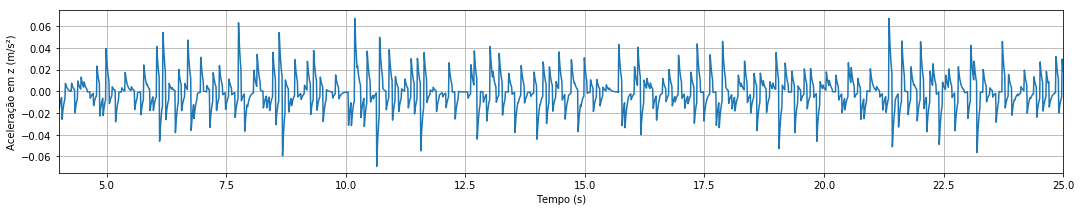

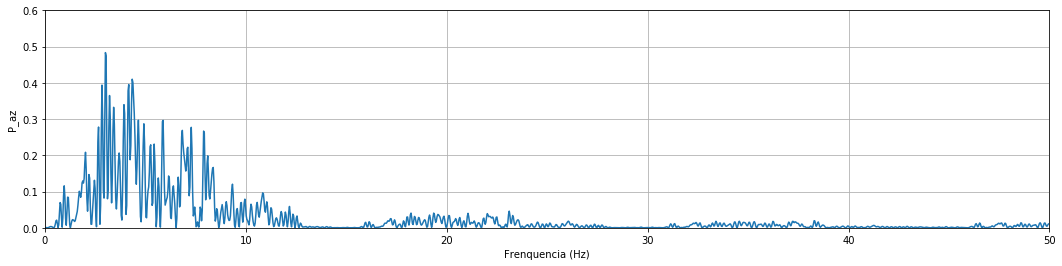

In [8]:
P_az, fs = az.periodogram()
f = az.f_axis()

az = MRPy(data[2], data.fs)  
t  = az.t_axis()

plt.figure(2, figsize=(18, 3), clear=True)
plt.plot(t, az[0])

plt.xlim(4,25);           plt.xlabel('Tempo (s)') 
plt.ylim(-0.075,0.075);   plt.ylabel('Aceleração em z (m/s²)') 

plt.grid(True)

plt.figure(10, figsize=(18, 4), clear=True)
plt.plot(f, P_az[0])

plt.xlim(0, 50);    plt.xlabel('Frenquencia (Hz)') 
plt.ylim(0, 0.6);   plt.ylabel('P_az') 

plt.grid(True)



## 7. Períodograma de saída (output) <a name="section_7"></a> 
Já nesta seção, com os valores gerados pela diferencial de Duhamelo, foi determinado o periodograma de saída.

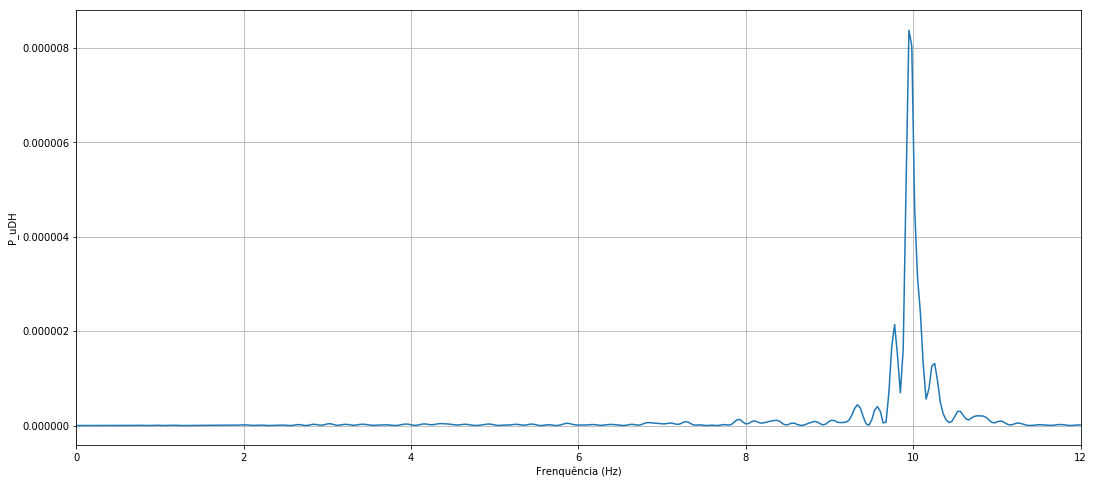

In [9]:
P_uDH, fs = u_DH.periodogram() 
f = u_DH.f_axis()

plt.figure(8, figsize=(18, 8), clear=True)
plt.plot(f, P_uDH[0])

plt.xlim(0, 12);  plt.xlabel('Frenquência (Hz)')  
plt.ylabel('P_uDH') 

plt.grid(True)